In [34]:
import numpy as np
import pandas as pd
import geopandas as gpd
import osmnx as ox
import networkx as nx
from matplotlib.collections import LineCollection
from shapely.geometry import Point, Polygon, LineString
from os import path, listdir
import matplotlib.pyplot as plt
from pathlib import Path
import datetime

In [2]:
from main import get_graph, draw_graph

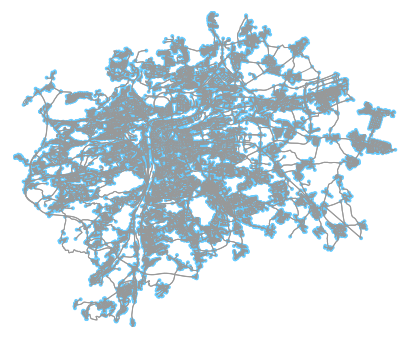

In [3]:
G = get_graph('Prague', True)

      time_ms  pickup_lat  pickup_lon  dropoff_lat  dropoff_lon  \
0  26819000.0   50.017612   14.442450    50.089226    14.437086   
1  30420000.0   50.089226   14.437086    50.059178    14.425957   
2  53546000.0   50.059178   14.425957    50.107099    14.398947   
3  69630000.0   50.107099   14.398947    50.017612    14.442450   
4  27376000.0   50.016310   14.436723    50.039678    14.437073   

                        time                      pgeom  \
0  0 days 07:26:59.000000000  POINT (14.44245 50.01761)   
1  0 days 08:27:00.000000000  POINT (14.43709 50.08923)   
2  0 days 14:52:26.000000000  POINT (14.42596 50.05918)   
3  0 days 19:20:30.000000000  POINT (14.39895 50.10710)   
4  0 days 07:36:16.000000000  POINT (14.43672 50.01631)   

                         dgeom  
0  POINT (14.437086 50.089226)  
1  POINT (14.425957 50.059178)  
2  POINT (14.398947 50.107099)  
3   POINT (14.44245 50.017612)  
4  POINT (14.437073 50.039678)  


NameError: name 'start_time' is not defined

In [55]:
cols = ['time','pickup_lat','pickup_lon','dropoff_lat','dropoff_lon']
home = str(Path.home())
df = pd.read_csv(path.join(home, 'Downloads', 'trips.txt'), 
                 index_col=None, header=None, sep=' ', names=cols)
df.rename(columns={'time': 'time_ms'}, inplace=True)
df.sort_values(by='time_ms', inplace=True)
df['time'] = pd.to_datetime(df['time_ms']*1e6)  
# df['time'] = df.time_ms.apply(lambda ms: datetime.timedelta(milliseconds=ms))
df.to_csv('prague_df.csv', index=False)



In [58]:
df = pd.read_csv('prague_df.csv', index_col=None, parse_dates=True)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.pickup_lon, df.pickup_lat))
gdf = gdf.rename(columns={'geometry': 'pgeom'}).set_geometry('pgeom')
gdf['dgeom'] = gpd.points_from_xy(df.dropoff_lon, df.dropoff_lat)

print(gdf.head(20))
mask = (df['time'] >= datetime.datetime(1970,1,1,0,0, 0) & (df['time'] < '00:01:00')
print(df.loc[mask])

     time_ms  pickup_lat  pickup_lon  dropoff_lat  dropoff_lon  \
0    11000.0   50.067048   14.433072    50.067086    14.448036   
1    24000.0   50.134852   14.548745    50.038012    14.548049   
2    90000.0   50.108229   14.493046    50.138095    14.502776   
3   180000.0   50.041021   14.437212    50.092051    14.352010   
4   188000.0   50.112727   14.622089    50.036490    14.525684   
5   239000.0   50.033186   14.510615    50.072891    14.393364   
6   253000.0   50.128250   14.472577    50.067086    14.448036   
7   264000.0   50.071961   14.544153    50.062545    14.427286   
8   291000.0   50.099817   14.431874    50.083881    14.319275   
9   298000.0   50.011363   14.419531    50.048882    14.442971   
10  318000.0   50.147942   14.523483    50.133442    14.454756   
11  344000.0   50.036567   14.336341    50.073147    14.403828   
12  366000.0   50.053878   14.341340    50.078680    14.429684   
13  432000.0   50.091854   14.488602    50.098994    14.521390   
14  459000